In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("C:/Users/ENTER NAME/Downloads/Sample_Data.csv")

In [4]:
df.columns

Index(['S.NO', 'District Name', 'Depot Code', 'Mandal_Name',
       'Retailer Category', 'Category  A_Total Bottle',
       'Category  A_Sale Value', 'Category  B_Total Bottle',
       'Category  B_Sale Value', 'Category  C_Total Bottle',
       'Category  C_Sale Value', 'Total Volume ', 'Total Sale Value', 'Month',
       'Year', 'Unnamed: 15'],
      dtype='object')

In [ ]:
#2
df[['District Name','Total Sale Value']]

In [10]:
df.groupby(['District Name','Mandal_Name'])

In [14]:
np.corrcoef(df['Category  A_Sale Value'],df['Category  B_Sale Value'])

array([[1.        , 0.44876032],
       [0.44876032, 1.        ]])

In [ ]:
df['Mandal_Name'].unique()

In [11]:
df_3=df[((df['Month']==3) | (df['Month']==4)| (df['Month']==5))& (df['Year']==2022)]

In [16]:
df_3[['District Name','Total Volume ']].sort_values(by='Total Volume ', ascending=False)

,District Name,Total Volume
25393,District-H,219770
223,District-K,218532
52601,District-J,215240
25432,District-H,213174
28519,District-J,209928
...,...,...
43460,District-G,2264
62409,District-H,2058
15261,District-D,1430
12735,District-K,562


In [15]:
df[df['District Name']=='District-C'].sort_values(by='Category  B_Sale Value', ascending=False)[['Month']]

,Month
19708,6
19714,5
61215,5
19431,3
19702,5
...,...
13221,10
45835,11
19419,9
42,11


In [17]:
df.head()

,S.NO,District Name,Depot Code,Mandal_Name,Retailer Category,Category A_Total Bottle,Category A_Sale Value,Category B_Total Bottle,Category B_Sale Value,Category C_Total Bottle,Category C_Sale Value,Total Volume,Total Sale Value,Month,Year,Unnamed: 15
0,672,District-C,84,Mandal 63,GRO,20974,3890320,1228,261320,0,0,22202,4151640,11,2021,NaN
1,660,District-C,84,Mandal 63,GRO,22136,4254300,1306,271080,0,0,23442,4525380,8,2021,NaN
2,2783,District-A,74,Mandal 25,Walk In Store,92,65340,70,15060,0,0,162,80400,9,2021,NaN
3,667,District-C,84,Mandal 63,GRO,23132,4554100,1698,356600,0,0,24830,4910700,9,2021,NaN
4,610,District-C,84,Mandal 63,GRO,25144,4832480,2442,506760,0,0,27586,5339240,4,2021,NaN


In [42]:
q3_2021_sales=df[(df['Year']==2021) & ((df['Month']==7) |(df['Month']==8) |(df['Month']==9))][['Retailer Category','Total Sale Value']]

In [37]:
sales21=q3_2021_sales.groupby(by='Retailer Category').sum()
sales21

,Total Sale Value
Retailer Category,
GRO,105816515860
Tourism Outlet,1871395240
Tourism Walkin,932653760
Walk In Store,1134957220


In [39]:
q3_2022_sales=df[(df['Year']==2022) & ((df['Month']==7) |(df['Month']==8) |(df['Month']==9))][['Retailer Category','Total Sale Value']]
sales22=q3_2022_sales.groupby(by='Retailer Category').sum()
sales22

,Total Sale Value
Retailer Category,
GRO,111886211760
Tourism Outlet,6140540780
Tourism Walkin,4696811620
Walk In Store,1050938440


In [41]:
growth=(sales22-sales21)*100/sales21
growth

,Total Sale Value
Retailer Category,
GRO,5.736057
Tourism Outlet,228.126344
Tourism Walkin,403.596492
Walk In Store,-7.402815


In [43]:
import matplotlib.pyplot as plt

In [55]:
sales21.rename({'Total Sale Value':'Q3 2021 sales'}, axis=1, inplace=True)

In [56]:
sales22.rename({'Total Sale Value':'Q3 2022 sales'}, axis=1, inplace=True)

In [62]:
sales21.reset_index(inplace=True)

In [63]:
sales22.reset_index(inplace=True)

In [66]:
sales_data = sales21.merge(sales22)

In [74]:
sales_data

,Retailer Category,Q3 2021 sales,Q3 2022 sales
0,GRO,105816515860,111886211760
1,Tourism Outlet,1871395240,6140540780
2,Tourism Walkin,932653760,4696811620
3,Walk In Store,1134957220,1050938440


In [71]:
import seaborn as sns

Text(0.5, 1.0, 'Retailer wise sales for 2021 and 2022')

<Figure size 432x288 with 0 Axes>

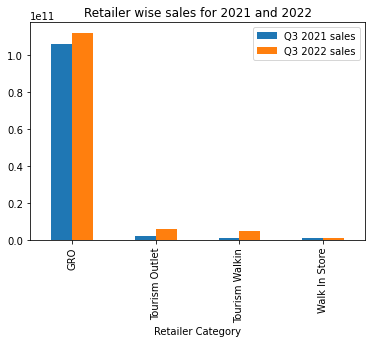

In [93]:
plt.figure()
sales_data.plot(x="Retailer Category", y=["Q3 2021 sales", "Q3 2022 sales"], kind="bar")
plt.title('Retailer wise sales for 2021 and 2022')